In [1]:
import pandas as pd
from scipy import stats
import seaborn as sb
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [11.7, 8.27]})

In [2]:
df = pd.read_excel('./Grupo 01.xlsx')

# Functions

In [3]:
def fill_dataframes (names: list,val: dict):
    """Generate a dataframe using value list instead single values.

    Args:
        names(str): name of variable or columns
        val(int): values for each column, should be a dict to use its
        key to make match with name string id and insert in df.

    Return:
        Pandas dataframe
    """

    df_output = pd.DataFrame()
    for i in names:
        df_output[i] = val[i]
    return df_output

In [4]:
def acum_freq (dataframe, option):
    """Generate frequency table including accumulates.

    Args:
        dataframe(pd.Dataframe): df with rel and abs requencies. The sum of them are the acums.
        option(int): to choise frequency's type to calculate.
    """

    indexer = 0
    accumulated = []

    if option == 1: #opcion para obtener la frecuencia absoluta
       values = dataframe['Frecuencia_absoluta'].values

       for i in values:
            indexer = indexer + i
            accumulated.append(indexer)

       dataframe['Frec_absoluta_acumulada'] = accumulated

    elif option == 2: #opcion para obtener la frecuencia relativa
        values = dataframe['Frecuencia_relativa'].values

        for i in values:
            indexer = indexer + i
            accumulated.append(indexer)

        dataframe['Frec_relativa_acumulada'] = accumulated

def abs_freq (values):
    """Get absolute frequency given values to count.

    Args:
        values(pd.Dataframe): structure with values to count frequency.

    Return:
        New dataframe with abs freq.
    """

    frec_ab = values.value_counts() #this pd.function only gives absolute freq.
    frec_df = pd.DataFrame(frec_ab)
    frec_df.columns = ['Frecuencia_absoluta']
    return frec_df

def rel_freq (dataframe, source):
    """Add new column in df with relative frequencies given abs before.

    Args:
        dataframe(pd.DataFrame): df with absolute values.
        source(np.array): list of values to know the length.
    """

    dataframe['Frecuencia_relativa'] = round(dataframe['Frecuencia_absoluta'] * 100 / source,3)


In [40]:
def freq(values):
    """Function to get abs|rel frequencies in sigle line of code.

    Args:
        values(pd.Dataframe): list of values to count frequency.

    Return:
        A dataframe with frequencies.
    """

    length = len(values)
    accumulated = []
    counter = 0

    f_df = abs_freq(values)
    rel_freq(f_df,length)

    for_counting('Frecuencia_abs_accum','Frecuencia_absoluta',f_df)
    for_counting('Frecuencia_rel_accum','Frecuencia_relativa', f_df)

    return f_df


def for_counting(new_col,col,df):
    """Add new column in df with summed values. The diff between this and
    .sum() method is that returns array with sequence of sums, not only the
    total sum.

    Args:
        new_col(str): name of new column to add in df.
        col(str): name of column in df to make the sum.
        df(pd.DataFrame): dataframe with values.
    """
    counter = 0
    accumulated = []
    for value in df[col].values:
       counter = counter + value
       accumulated.append(counter)

    df[new_col] = accumulated



In [6]:
def central_m (datasource, num_variable, qul_variable):
    """Generate df with central measures regarding dichotomy variable.

    Args:
        datasource(pd.Dataframe): source to get values.
        num_variable(str): name of column in datasource to get numeric values.
        qul_variable(str): name of column in datasource to get dichotomy values.

    Return:
        A dataframe with central measures regarding dichotomy variable.
    """

    try:
        var_filter = datasource[num_variable]
        df = pd.DataFrame()
        df['media'] = var_filter
        df['qualitative_index'] = datasource[qul_variable]
        gb_gateway = round(df.groupby(['qualitative_index']).mean(),2)
        gb_gateway['mediana'] = df.groupby(['qualitative_index']).median().values
        gb_gateway['mode'] = df.groupby(['qualitative_index']).agg(pd.Series.mode).values # due mode is a serie with numeric and string, we just take numeric values and use pd.agg() to apply nested function.
        return gb_gateway

    except Exception:
        print(f"Something was wrong while function, {type(Exception.__name__)}")


# Center measures 🧷

In [7]:
variables = ['precio','mt2','estrato','alcobas','banos','administracion','avaluo']

var_media = [round(df[i].mean(),2) for i in variables]
var_mediana = [round(df[i].median(),2) for i in variables]
var_mode  = [df[i].mode().values for i in variables]
var_media_geo = [round(stats.gmean(df[i]),2) for i in variables]
var_media_arm = [round(stats.hmean(df[i]),2) for i in variables]

df_variables = pd.DataFrame(var_media)
df_variables.columns = ['Media']
df_variables['Mediana'] = var_mediana
df_variables['Moda'] = var_mode
df_variables['Media_geometrica'] = var_media_geo
df_variables['Media_armonica'] = var_media_arm
df_variables

C:\Users\kevin\miniconda3\envs\Laboratorio-practico-2\lib\site-packages\scipy\stats\stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


,Media,Mediana,Moda,Media_geometrica,Media_armonica
0,317.04,245.00,[220.0],253.47,206.39
1,120.01,96.00,[60.0],103.67,91.74
2,4.65,5.00,[6],4.48,4.30
3,2.89,3.00,[3],2.81,2.71
4,2.29,2.00,[2],2.16,2.03
5,0.26,0.19,[0.0],0.00,0.00
6,185.33,133.69,"[28.08274, 74.0, 95.0, 159.0]",125.95,25.06


# Scatter measures

In [8]:
var_std = [round(df[i].std(),2) for i in variables]
var_min = [df[i].min() for i in variables]
var_max = [df[i].max() for i in variables]
var_q1 = [round(df[i].quantile(q=0.25),2) for i in variables]
var_q3 = [round(df[i].quantile(q=0.75),2) for i in variables]
var_var = [round(df[i].var(),2) for i in variables]
var_asi = [round(df[i].skew(),2) for i in variables]
var_kur = [round(stats.kurtosis(df[i], fisher=True),2) for i in variables]
var_range = [df[i].max() - df[i].min() for i in variables]

values = {
    'std': var_std,
    'min': var_min,
    'max': var_max,
    'q1': var_q1,
    'q3': var_q3,
    'var': var_var,
    'asi': var_asi,
    'kur': var_kur,
    'range': var_range,
}

name_col = ['std','min','max','q1','q3','var','asi','kur','range']

df_sct = fill_dataframes(name_col, values)
df_sct

,std,min,max,q1,q3,var,asi,kur,range
0,247.87,25.000,1700.00,160.00,380.00,61439.09,2.39,7.04,1675.000
1,74.00,26.000,500.00,72.00,140.00,5475.51,1.89,3.98,474.000
2,1.19,2.000,6.00,4.00,6.00,1.43,-0.25,-1.33,4.000
3,0.64,1.000,5.00,3.00,3.00,0.41,-0.10,1.55,4.000
4,0.78,1.000,5.00,2.00,3.00,0.61,0.76,0.83,4.000
5,0.26,0.000,2.28,0.09,0.36,0.07,2.21,10.48,2.280
6,176.53,0.149,1518.14,73.11,231.76,31164.46,2.79,12.96,1517.991


Functions to get absolutes and relatives frequencies

In [41]:
var_ubicacion = df['ubicacion']

'''Frecuencia absoluta'''

# frec_ubicacion = abs_freq(var_ubicacion)

'''Frecuencia relativa'''

# rel_freq(frec_ubicacion, var_ubicacion)

'''Frecuencia absoluta acumulada'''
# acum_freq(frec_ubicacion, 1)

'''Frecuencia relativa acumulada'''

# acum_freq(frec_ubicacion, 2)
# frec_ubicacion
freq(var_ubicacion) #the output is correct, but I need to for each tuple do the sum starting from 134 to 347 at final tuple.

,Frecuencia_absoluta,Frecuencia_relativa,Frecuencia_abs_accum,Frecuencia_rel_accum
poblado,134,38.617,134,38.617
aburra sur,84,24.207,218,62.824
laureles,36,10.375,254,73.199
occidente,35,10.086,289,83.285
belen guayabal,34,9.798,323,93.083
centro,19,5.476,342,98.559
norte,5,1.441,347,100.000


# Charts

Text(0.5, 1.0, 'Avaluo de los apartamentos vs sus precios de venta y estrato al que pertencen')

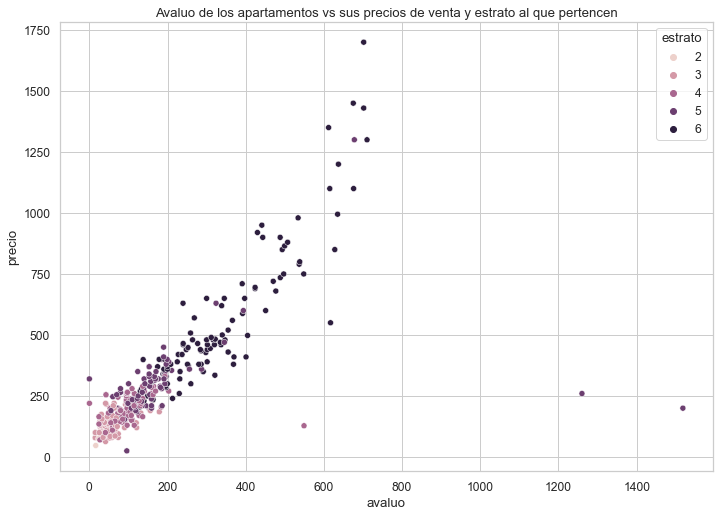

In [12]:
sb.scatterplot(x='avaluo',y='precio',data=df,hue='estrato').set_title("Avaluo de los apartamentos vs sus precios de venta y estrato al que pertencen")

Text(0.5, 1.0, 'Ubicaciones con más apartamentos terminados')

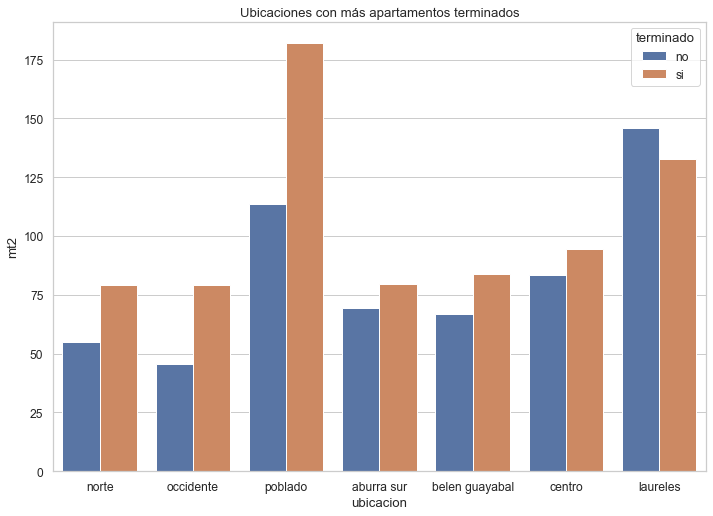

In [13]:
sb.barplot(x='ubicacion',y='mt2',hue='terminado',data=df,ci=None).set_title("Ubicaciones con más apartamentos terminados")

Function to get central measures

Text(0.5, 1.0, 'Medidas de tendecia central de los mt2 segun estado de construccion')

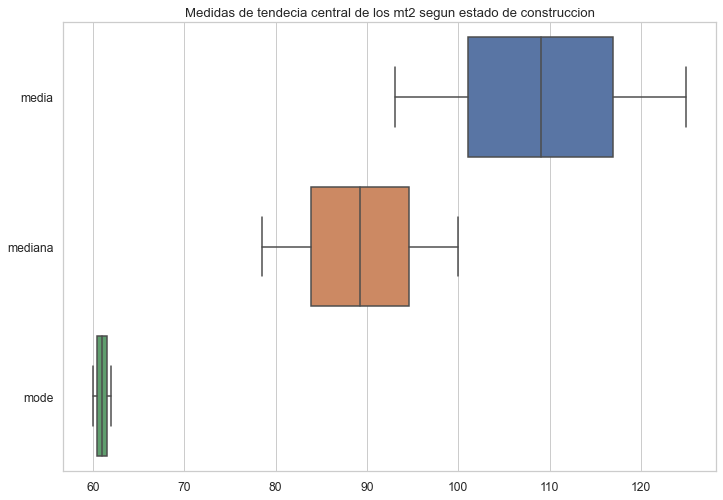

In [14]:
sb.boxplot(data=mt2_ended_cm, orient='h').set_title("Medidas de tendecia central de los mt2 segun estado de construccion")